# Diabetes Indicator 2015 BRFSS

In [1]:
import numpy as np
import pandas as pd
import csv
import math
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from mlxtend.plotting import plot_confusion_matrix 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

sns.set_theme()

# FILEPATH
import matplotlib.pyplot as plt

# Process Data

## Import Data

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [3]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


## Data Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

## EDA

In [5]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

       Diabetes_binary        HighBP      HighChol     CholCheck  \
count     70692.000000  70692.000000  70692.000000  70692.000000   
mean          0.500000      0.563458      0.525703      0.975259   
std           0.500004      0.495960      0.499342      0.155336   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.500000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  70692.000000  70692.000000  70692.000000          70692.000000   
mean      29.856985      0.475273      0.062171              0.147810   
std        7.113954      0.499392      0.241468              0.354914   
min       12.000000      0.000000      0.000000              0.000000   
25%       25.000000   

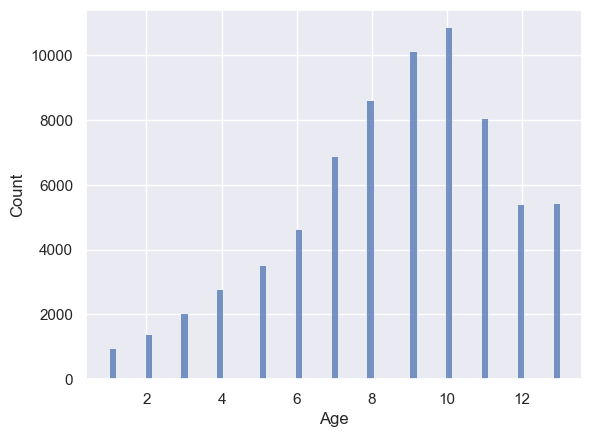

In [6]:
# Histogram of a numerical variable
sns.histplot(data=df, x='Age')
plt.show()

#  Age 18 to 24 Respondents with reported age between 18 and 24 years (18 <= AGE <= 24)
# 2 Age 25 to 29 Respondents with reported age between 25 and 29 years (25 <= AGE <= 29)
# 3 Age 30 to 34 Respondents with reported age between 30 and 34 years (30 <= AGE <= 34)
# 4 Age 35 to 39 Respondents with reported age between 35 and 39 years (35 <= AGE <= 39)
# 5 Age 40 to 44 Respondents with reported age between 40 and 44 years (40 <= AGE <= 44)
# 6 Age 45 to 49 Respondents with reported age between 45 and 49 years (45 <= AGE <= 49)
# 7 Age 50 to 54 Respondents with reported age between 50 and 54 years (50 <= AGE <= 54)
# 8 Age 55 to 59 Respondents with reported age between 55 and 59 years (55 <= AGE <= 59)
# 9 Age 60 to 64 Respondents with reported age between 60 and 64 years (60 <= AGE <= 64)
# 10 Age 65 to 69 Respondents with reported age between 65 and 69 years (65 <= AGE <= 69)
# 11 Age 70 to 74 Respondents with reported age between 70 and 74 years (70 <= AGE <= 74)
# 12 Age 75 to 79 Respondents with reported age between 75 and 79 years (75 <= AGE <= 79)
# 13 Age 80 or older Respondents with reported age between 80 and 99 years (80 <= AGE <= 99)

In [7]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

<Axes: xlabel='Income', ylabel='Count'>

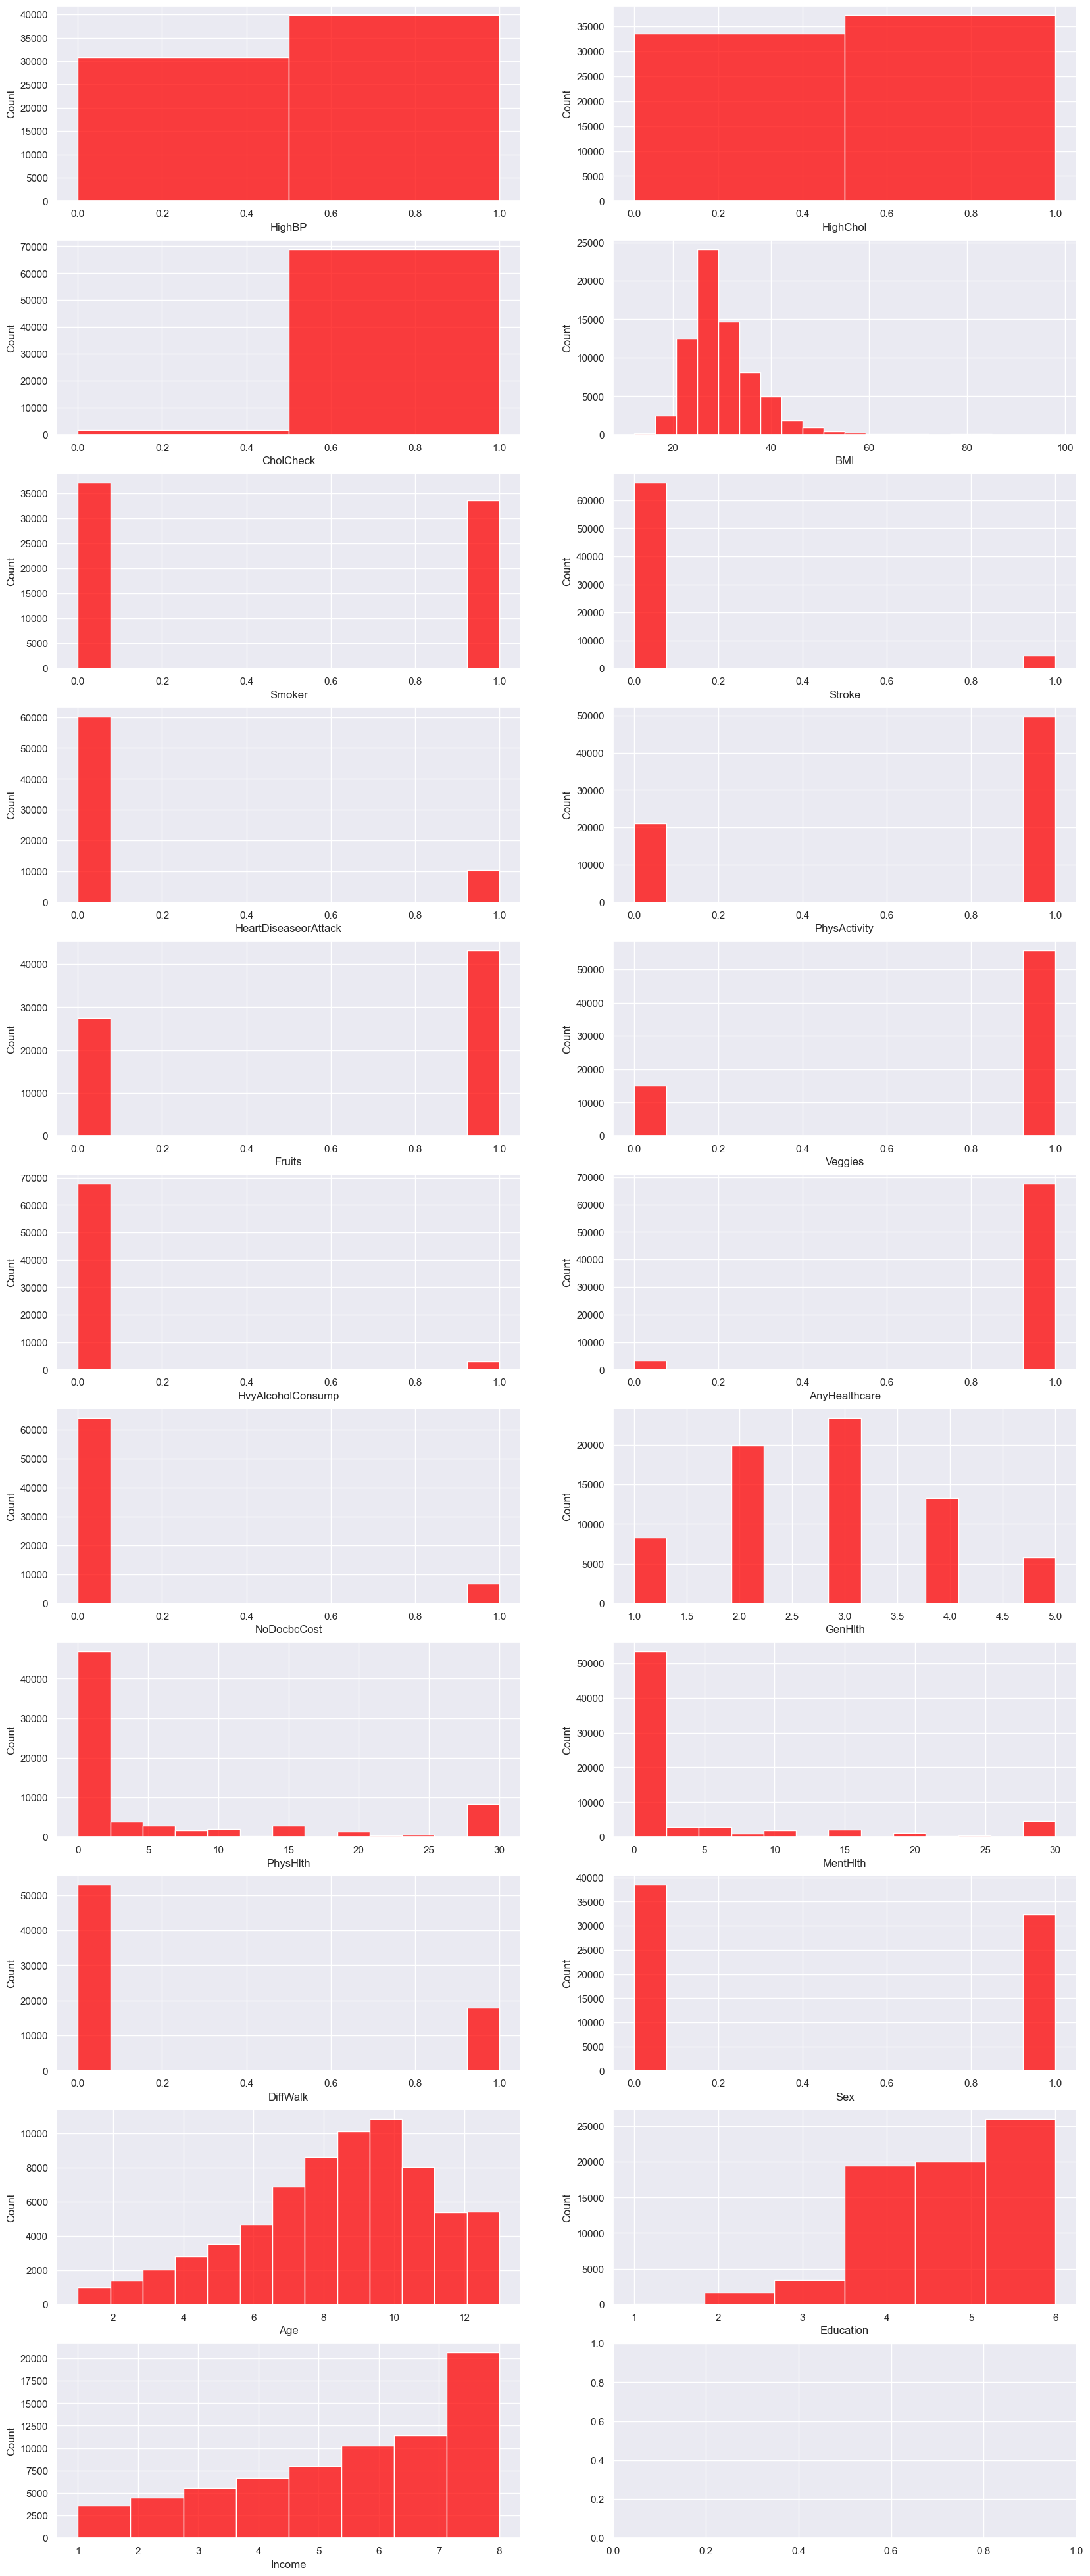

In [8]:
# Density Graph 

fig,ax = plt.subplots(11,2, figsize=(20,50))

sns.histplot(df.HighBP, bins=2,color="red", ax=ax[0,0])
sns.histplot(df.HighChol, bins=2,color="red", ax=ax[0,1])
sns.histplot(df.CholCheck, bins=2,color="red", ax=ax[1,0])
sns.histplot(df.BMI, bins=20, color="red", ax=ax[1,1])
sns.histplot(df.Smoker, bins=13, color="red", ax=ax[2,0])
sns.histplot(df.Stroke, bins=13, color="red", ax=ax[2,1])
sns.histplot(df.HeartDiseaseorAttack, bins=13, color="red", ax=ax[3,0])
sns.histplot(df.PhysActivity, bins=13, color="red", ax=ax[3,1])
sns.histplot(df.Fruits, bins=13, color="red", ax=ax[4,0])
sns.histplot(df.Veggies, bins=13, color="red", ax=ax[4,1])
sns.histplot(df.HvyAlcoholConsump, bins=13, color="red", ax=ax[5,0])
sns.histplot(df.AnyHealthcare, bins=13, color="red", ax=ax[5,1])
sns.histplot(df.NoDocbcCost, bins=13, color="red", ax=ax[6,0])
sns.histplot(df.GenHlth, bins=13, color="red", ax=ax[6,1])
sns.histplot(df.MentHlth, bins=13, color="red", ax=ax[7,1])
sns.histplot(df.PhysHlth, bins=13, color="red", ax=ax[7,0])
sns.histplot(df.DiffWalk, bins=13, color="red", ax=ax[8,0])
sns.histplot(df.Sex, bins=13, color="red", ax=ax[8,1])
sns.histplot(df.Age, bins=13,color="red", ax=ax[9,0])
sns.histplot(df.Education, bins=6,color="red", ax=ax[9,1])
sns.histplot(df.Income, bins=8,color="red", ax=ax[10,0])

In [9]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

                      Diabetes_binary    HighBP  HighChol  CholCheck  \
Diabetes_binary              1.000000  0.381516  0.289213   0.115382   
HighBP                       0.381516  1.000000  0.316515   0.103283   
HighChol                     0.289213  0.316515  1.000000   0.085981   
CholCheck                    0.115382  0.103283  0.085981   1.000000   
BMI                          0.293373  0.241019  0.131309   0.045648   
Smoker                       0.085999  0.087438  0.093398  -0.004331   
Stroke                       0.125427  0.129060  0.099786   0.022529   
HeartDiseaseorAttack         0.211523  0.210750  0.181187   0.043497   
PhysActivity                -0.158666 -0.136102 -0.090453  -0.008249   
Fruits                      -0.054077 -0.040852 -0.047384   0.017384   
Veggies                     -0.079293 -0.066624 -0.042836   0.000349   
HvyAlcoholConsump           -0.094853 -0.027030 -0.025443  -0.027146   
AnyHealthcare                0.023191  0.035764  0.031532   0.10

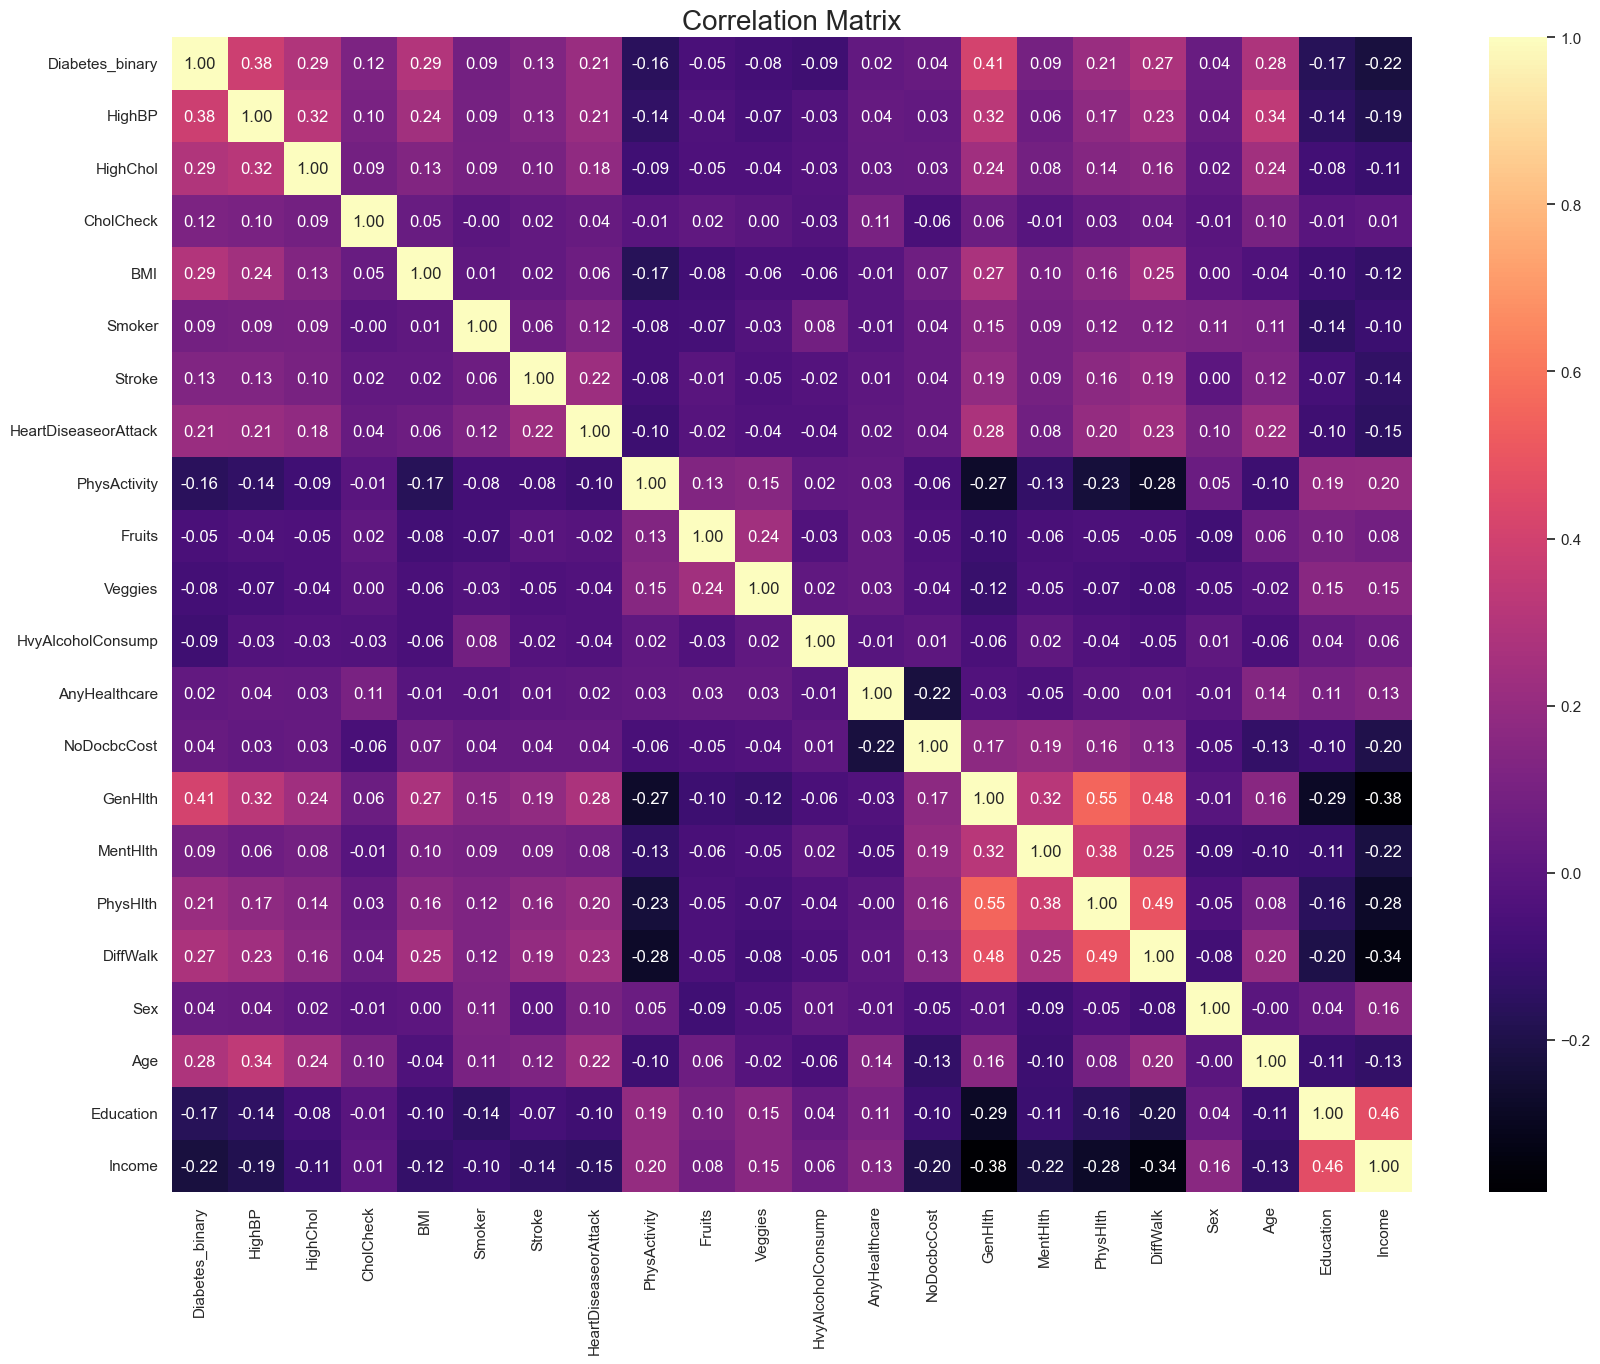

In [10]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

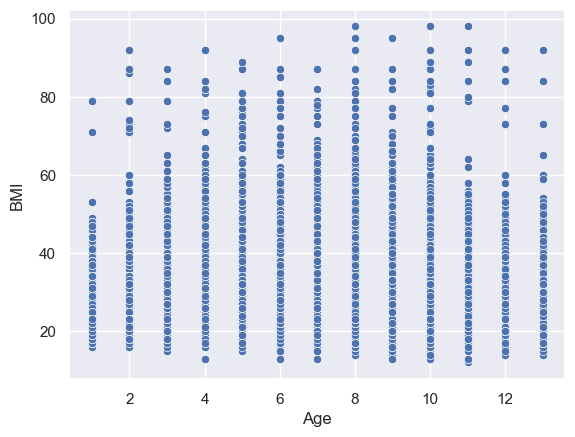

In [11]:
# Scatter plot of two numerical variables
sns.scatterplot(data=df, x='Age', y='BMI')
plt.show()

In [12]:
hig_corr = df.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Diabetes_binary"]) >= 0.2]
hig_corr_features

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack',
       'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income'],
      dtype='object')

## Remove outliers

In [13]:
for feature in df:
    q = df[feature].quantile(0.98)  # Select q range as 98%
    df_clean = df[df[feature] < q]

In [14]:
df.shape

(70692, 22)

In [15]:
df_clean.shape

(50046, 22)

## Split train/test 

In [16]:
# Separate data features by removing the data label.
X = df_clean.drop(columns=["Diabetes_binary"], axis=1)

# Assign data label to variable y
y = df_clean.Diabetes_binary

# Split train/test with a random state
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, train_size=0.8)

In [17]:
y.value_counts()

Diabetes_binary
1.0    28151
0.0    21895
Name: count, dtype: int64

## Normalized Data

In [18]:
# Initialize and use StandardScaler to normalize the data
scaler = StandardScaler()
X_normalized_train = scaler.fit_transform(X_train)     # Fit and transform thr training data
X_normalized_test = scaler.transform(X_test)           # Only transform the test data.

# Train

## XGBoost

In [19]:
xg = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
xg.fit(X_normalized_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [20]:
#extracting default parameters from benchmark model
default_params = {}
gparams = xg.get_params()

#default parameters have to be wrapped in lists - even single values - so GridSearchCV can take them as inputs
for key in gparams.keys():
    gp = gparams[key]
    default_params[key] = [gp]
print(default_params)

{'objective': ['binary:logistic'], 'base_score': [None], 'booster': [None], 'callbacks': [None], 'colsample_bylevel': [None], 'colsample_bynode': [None], 'colsample_bytree': [None], 'device': [None], 'early_stopping_rounds': [None], 'enable_categorical': [False], 'eval_metric': ['error'], 'feature_types': [None], 'gamma': [None], 'grow_policy': [None], 'importance_type': [None], 'interaction_constraints': [None], 'learning_rate': [0.1], 'max_bin': [None], 'max_cat_threshold': [None], 'max_cat_to_onehot': [None], 'max_delta_step': [None], 'max_depth': [None], 'max_leaves': [None], 'min_child_weight': [None], 'missing': [nan], 'monotone_constraints': [None], 'multi_strategy': [None], 'n_estimators': [None], 'n_jobs': [None], 'num_parallel_tree': [None], 'random_state': [None], 'reg_alpha': [None], 'reg_lambda': [None], 'sampling_method': [None], 'scale_pos_weight': [None], 'subsample': [None], 'tree_method': [None], 'validate_parameters': [None], 'verbosity': [None]}


In [21]:
y_pred = xg.predict(X_normalized_test)

print('Training set score: {:.4f}'.format(xg.score(X_normalized_train, y_train)))
print('Test set score: {:.4f}'.format(xg.score(X_normalized_test, y_test))) 

Training set score: 0.7667
Test set score: 0.7466


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.63      0.68      4360
         1.0       0.75      0.84      0.79      5650

    accuracy                           0.75     10010
   macro avg       0.75      0.73      0.74     10010
weighted avg       0.75      0.75      0.74     10010



## PSO Xgboost

In [ ]:
def fitness_function(keys, position,data, cv_splits, SEED):
    d = len(position) # number of dimensions aka number of parameters we are tuning
    X, y = data
    xgboost_param_by_position = dict(zip(keys, position))

    cv_results = cross_validate(
                    estimator=XGBClassifier(random_state=SEED, **xgboost_param_by_position),
                    cv=cv_splits,
                    X=X,
                    y=y,
                    scoring="recall"
                )
    mean_cv_score = cv_results['test_score'].mean()

    # Option: Evaluate by accuracy: TP + TN 
    # X_normalized_train, X_normalized_test, y_train, y_test = data
    # xglassifier = XGBClassifier(**xgboost_param_by_position)
    # xglassifier.fit(X_normalized_train, y_train)
    # y_train_pred = xglassifier.predict(X_normalized_train)
    # y_test_pred = xglassifier.predict(X_normalized_test)
    # Accuracy: TP + TN 
    # return [confusion_matrix(y_train,y_train_pred)[0][1] + confusion_matrix(y_train,y_train_pred)[1][0], confusion_matrix(y_test,y_test_pred)[0][1] + confusion_matrix(y_test,y_test_pred)[1][0]]
    return mean_cv_score

In [73]:
def pso_xgboost(data, fitness_function, cv_splits, SEED, bounds, swarm_size, max_iter, c1 = 2.0, c2 = 2.0, W = 0.5):    
    # Separate train/test data
    X_normalized_train, X_normalized_test, y_train, y_test = data
    train_data = (X_normalized_train, y_train)

    dimension = len(bounds) # number of dimensions aka number of parameters we are tuning
    keys = list(bounds.keys())

    rounding = []
    for key in list(bounds.keys()): 
        if key == "max_depth" or key == "n_estimators": 
            rounding.append(1) 
        else: 
            rounding.append(0)
    # print(rounding)
    particle_position_vector = list([list([np.random.uniform(bounds[k][0], bounds[k][1]) for k in keys]) for _ in range(swarm_size)])
    for i in range(swarm_size): 
        for j in range(len(bounds)): 
            if rounding[j]:
                particle_position_vector[i][j] = int(particle_position_vector[i][j]) # sao k round dc

    pbest_position = particle_position_vector.copy()
    pbest_fitness_value = list([float('inf') for _ in range(swarm_size)])
    gbest_fitness_value = float('-inf')
    gbest_position = list([float(0) for d in range(dimension)])
    velocity_vector = ([list([float(0) for d in range(dimension)]) for _ in range(swarm_size)])
    new_velocity = list([float(0) for d in range(dimension)])
    new_position = list([float(0) for d in range(dimension)])

    for _ in range(max_iter):
        for i in range(swarm_size):
            fitness_cadidate = fitness_function(keys, particle_position_vector[i], train_data, cv_splits, SEED)
            # print("Value at particle-", i, "is (training)", fitness_cadidate, " At (min_child_weight, gamma, max_depth, learning_rate): ",
            #        particle_position_vector[i])

            if (pbest_fitness_value[i] < fitness_cadidate):
                pbest_fitness_value[i] = fitness_cadidate[1].copy()
                pbest_position[i] = particle_position_vector[i].copy()
            if (gbest_fitness_value < fitness_cadidate):
                gbest_fitness_value = fitness_cadidate.copy()
                gbest_position = particle_position_vector[i].copy()

        for i in range(swarm_size):
            for d in range(dimension):      
                # này mình sẽ muốn random factor nó giong nhau cho cac dimension luon hay cũng khác       
                new_velocity[d] = (W * velocity_vector[i][d]) + (c1 * np.random.random()) * (
                        pbest_position[i][d] - particle_position_vector[i][d]) + (c2 * np.random.random()) * (
                        gbest_position[d] - particle_position_vector[i][d])
                
                new_position[d] = new_velocity[d] + particle_position_vector[i][d]
            
                if rounding[d]:
                    new_position[d] = int(new_position[d])
                if new_position[d] < bounds[list(bounds.keys())[d]][0]: 
                    new_position[d] = bounds[list(bounds.keys())[d]][0]
                elif new_position[d] > bounds[list(bounds.keys())[d]][1]: 
                    new_position[d] = bounds[list(bounds.keys())[d]][1] 
            particle_position_vector[i] = new_position.copy() # True không bị assign pointer 

    XGB = XGBClassifier(eval_metric= 'error', **dict(zip(keys, gbest_position)))
    XGB.fit(X_normalized_train, y_train)
    y_test_predictions = XGB.predict(X_normalized_test)
    print(y_test_predictions)
    TP = confusion_matrix(y_test,y_test_predictions)[1][1]
    FN = confusion_matrix(y_test,y_test_predictions)[1][0] 
    test_set_confirmation_results = TP / (TP + FN)
    
    return (gbest_position, gbest_fitness_value, test_set_confirmation_results)

## Gridsearch: version 2: this is more optimal than ver1


In [71]:
def grid_search_nd_modified(data, bounds, max_iter, cv_split, SEED):
    # Separate train/test data
    X_normalized_train, X_normalized_test, y_train, y_test = data
    train_data = X_normalized_train, y_train

    # Dimension
    dimension = len(bounds)

    # Create key list
    keys = []
    for key in list(bounds.keys()): 
        keys.append(key)
    
    # Rounding for parameters that are only accept integer values
    rounding = []
    for key in list(bounds.keys()): 
        if key == "max_depth" or key == "n_estimators": 
            rounding.append(1) 
        else: 
            rounding.append(0)
    
    # Calculate number of points in each dimension
    points_each_dim = int(max_iter**(1/dimension))

    # Calculate stepsize (not assuming stepsize_x = stepsize_y)
    step_size = []
    for d in range(dimension):
        if not rounding[d]:
            step_size.append(0)
            # step_size.append((bounds[keys[d]][1] - bounds[keys[d]][0]) / (points_each_dim - 1))
        if rounding[d]: 
            step_size.append(int(math.ceil(bounds[keys[d]][1] - bounds[keys[d]][0]) / (points_each_dim - 1)))

    sorted_params = {}
    for key in keys: 
        if not rounding[keys.index(key)]:
            sorted_params[key] = list(np.linspace(start=bounds[key][0], stop=bounds[key][1], num=points_each_dim))
            # sorted_params[key] = list(np.arange(bounds[key][0], bounds[key][1] + step_size[keys.index(key)], step_size[keys.index(key)]))
        else:
            sorted_params[key] = list(np.arange(bounds[key][0], bounds[key][1], step_size[keys.index(key)]))
    print("sorted_params")


    XGB = XGBClassifier(eval_metric= 'error', random_state=SEED)    
    grid = GridSearchCV(estimator=XGB, param_grid=sorted_params, scoring='recall', cv=cv_split, verbose=1 )
    grid.fit(X_normalized_train, y_train)
    best_param = grid.best_params_
    best_score = grid.best_score_

    y_test_predictions = grid.predict(X_normalized_test)
    TP = confusion_matrix(y_test,y_test_predictions)[1][1]
    FN = confusion_matrix(y_test,y_test_predictions)[1][0] 
    test_set_confirmation_results = TP / (TP + FN)

    return best_param, best_score, test_set_confirmation_results

# Seed Cross-validation: PSO and GridSearch

In [75]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

# Set global seeds for reproducibility
SEED = 42

# Generate CV splits once (to reuse the same splits for both methods)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
cv_splits = list(cv.split(X_normalized_train, y_train))  # X, y are your data and labels
print("cv_splits")
print(cv_splits)

# Define the params 
data = (X_normalized_train, X_normalized_test, y_train, y_test)
test_bounds = {
        'min_child_weight': (0,5),
        'gamma': (0,10),
        'max_depth': (0,10),
        'learning_rate': (1e-2,1)
    }

# PSO
swarm_size = 16
max_iter = 16
param_pso, train_best_pso, test_best_pso = pso_xgboost(data, fitness_function, cv_splits, SEED, test_bounds, swarm_size, max_iter)
print("PSO")
print(param_pso, train_best_pso, test_best_pso)

# Grid Search 
print("\n")
param_grid, train_best_grid, test_best_grid = grid_search_nd_modified(data, test_bounds, 256, cv_splits, SEED)
print("Grid Search")
print(param_grid, train_best_grid, test_best_grid)

cv_splits
[(array([    1,     2,     3, ..., 40032, 40034, 40035], shape=(32028,)), array([    0,     8,    10, ..., 40010, 40018, 40033], shape=(8008,))), (array([    0,     2,     3, ..., 40033, 40034, 40035], shape=(32029,)), array([    1,     5,     7, ..., 40025, 40029, 40032], shape=(8007,))), (array([    0,     1,     2, ..., 40033, 40034, 40035], shape=(32029,)), array([    6,    13,    15, ..., 40026, 40027, 40028], shape=(8007,))), (array([    0,     1,     4, ..., 40032, 40033, 40035], shape=(32029,)), array([    2,     3,     9, ..., 40023, 40030, 40034], shape=(8007,))), (array([    0,     1,     2, ..., 40032, 40033, 40034], shape=(32029,)), array([    4,    17,    24, ..., 40024, 40031, 40035], shape=(8007,)))]
[1 0 0 ... 1 0 0]
PSO
[0.401423338835324, 9.425390479345761, 1, 0.01] 0.9250251252808017 0.9267256637168142


sorted_params
Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Grid Search
{'gamma': np.float64(0.0), 'learning_rate': np.float64(0.01), 'm